# **🔹 Containerization with Docker**

* Containerization = Apne application + uske dependencies (libraries, runtime, config) ko ek single package (container) me band karna.

* Ye container har jagah same tarah run hota hai (dev, test, prod, laptop, cloud).

* Docker is the most popular tool to create aur manage these containers.

# **🔹 Advantages of Containers (tumhare text ke base par)**

1. Isolation

    * Har container apna environment rakhta hai.

    * Agar tumhare paas 2 apps hain jinke dependencies alag hain (e.g. ek ko Python 3.10 chahiye, doosre ko 3.8), to bhi dono alag-alag containers me bina conflict ke chalenge.

2. Security

    * Isolation ke wajah se ek container doosre ko disturb nahi kar sakta.

    * Agar ek app crash bhi ho jaye, doosri apps safe rehti hain.

3. Scalability

    * Containers lightweight hote hain → quickly replicate kiye jaa sakte hain.

    * High traffic aaye to tum 1 se 100 containers spin up kar sakti ho.

4. Boot Speed

    * VM ko start karne me minutes lagte hain.

    * Container seconds me ready hota hai.

5. Loose Coupling

    * Containers independent hote hain.

    * Matlab tum ek app ko update ya delete kar sakti ho without breaking others.

* Portability

    * Ek hi Docker container har jagah chalega (Laptop → Testing server → Production → Cloud).

    * No more “works on my machine” issues.

* Flexibility (Deploy, replicate, move, backup easily)

Tum Docker image ko ek tarah se “software ka snapshot” samajh lo → usse kahin bhi deploy ya restore kar sakti ho.


# **📝 Interview-Ready Line**

“Docker provides containerization, which means packaging an application and its dependencies into lightweight, portable containers. Containers are isolated, secure, fast to start, scalable, loosely coupled, and highly portable, making them ideal for modern DevOps and cloud environments.”

# **WHY USE DOCKER?**



1. Independent apps

Har application apne container me run hota hai → doosre apps se interfere nahi karta.

2. Bundled environment

Ek container me runtime + libraries + dependencies + app sab included hota hai.

3. Solve dependency issues

Har team apne machine pe alag dependencies install karne ki zaroorat nahi → time & energy save hoti hai. Mtlb hm bs docker do wo docker run kry to use kry usko ni pta hona chahye k andr kya install krn kya ni. bs docker run krta eh wo or use krta eh.

4. Cloud-like flexibility

Tumhare infrastructure me chahe bare-metal server ho ya cloud, containers easily chal jaate hain.

5. Consistent environment

Development → Testing → Production → sab jagah same environment → “works on my machine” problem khatam.

🔹 Docker vs Virtualization

Virtualization → Multiple VMs, each with full OS → heavy + slow.

Containerization (Docker) → Multiple containers for apps → lightweight, fast, portable.

Docker Image:

* Docker Image = blueprint / template

* Ye read-only file hoti hai jisme app + dependencies + config sab hota hai.

* Jab ye run hoti hai, ek container ban jata hai (read-write instance of the image).

* Hm aik dusry ko bs docker image share kr skty hain. phr us image ko jab docker pe chalaty hain to wo container bn jata eh., hm container ni dety aik dsury ko.

* Tum container share nahi karte, kyunki container ek running instance hai aur har ek machine pe independent aur isolated hota hai.

* Aik image se aik se ziada container bna skti ho tm. phr mrzi se jo chahe container chaalao jo chahe bnd krdo.

* Tumhare paas ek Docker image hai (e.g. Flask app image). Tum us image ko 2 bar run karte ho → Docker 2 alag containers create karega.

* Aik image se 2 container kesy bnty hain???

Answer:

🔹 1. Docker Image = Blueprint

    * Image sirf ek template hai.

    * Isme app + dependencies + config sab included hota hai.

    * Read-only hoti hai → run nahi hoti.

🔹 2. Docker Run Command

Jab tum terminal me likhti ho:

        docker run my-image

Docker image ko copy karke ek new container banata hai.

Ye container read-write instance hota hai → app chal sakti hai, logs generate ho sakte hain, temporary files create ho sakti hain.

Tum agar same image ko 2nd time run karte ho:

      docker run my-image

Docker phir se ek new container create karega.
Ab 2 independent containers hain, dono same image se banae hue.



# **Q: Kya un dono containers k naam alag alag hon gay? un k naam kon decide krta eh ?**

Answer:

🔹 Container Names

* By Default (Automatic Name)

    Agar tum docker run my-image likh do bina name specify kiye, Docker khud ek random name assign karta hai, jaise:

        gracious_morse
        festive_hopper


Ye sirf container ko identify karne ke liye hota hai.

* Custom Name (Recommended)

Tum khud bhi container ka naam de sakti ho:

      docker run --name my-container1 my-image
      docker run --name my-container2 my-image


Isse tumhare containers easily identifiable ho jate hain.

🔹 Key Points

* Har container ka unique name hona chahiye ek host pe.
* Same image se multiple containers banaye ja rahe hain → unke names alag-alag hone chahiye.
* Name decide kar sakti ho ya Docker automatically generate karta hai.


# **Q: Docker hub kya hota eh docker desktop kya eh?**

## **🔹 1. Docker Hub**

* Docker Hub = online repository / cloud storage jahan Docker images ko store aur share karte hain.

Tum images ko:

    Push → upload karna (apni custom image)

    Pull → download karna (community ya official images)

Ye GitHub jaisa hai, lekin code ke bajaye Docker images ke liye.

Example:

Tumhare paas Python app image hai → tum Docker Hub pe push kar sakti ho → team ka har member pull karke container run kar sakta hai.

Official images bhi available hain → jaise python, nginx, ubuntu → directly pull karke use kar sakti ho.

**Tm apna image bnaun gi usko docker hub pe phenk dn gi or operational team se kahun gi k wahan se image utha lay.**

🔹 Flow step by step

1. Tumhari team (Developer)

  * Code likhti ho → Docker image banati ho

        docker build -t my-app-image .


  * Image test kar leti ho locally (Docker Desktop pe run karke).

2. Docker Hub pe upload (Push)

        docker tag my-app-image your-dockerhub-username/my-app-image
        docker push your-dockerhub-username/my-app-image


Ab image online repository me available hai.

3. Operational Team (Ops)

    * Tumhe bas inform karna → “Image Docker Hub pe ready hai.”

    * Ops team pull kar leti hai:

          docker pull your-dockerhub-username/my-app-image
          docker run -d --name my-app-container your-dockerhub-username/my-app-image


Ops team ke paas running container ready ho jata hai → code chal raha hai production ya staging pe.

🔹 Docker Hub visibility

  1. Public repository (default option)

  * Agar tum public repo banati ho → koi bhi Docker Hub user image ko dekh sakta hai aur pull kar sakta hai.

  * Example: Official Python image (python) → sab dekh sakte hain.

  2. Private repository

  * Agar tum private repo choose karti ho → sirf tum aur jo log access diye gaye hain wo image pull kar sakte hain.

  * Security ke liye important → confidential apps ya company code ke liye private repo use hota hai. Tumhe team members ko permission deni padti hai. Wo Access token ya login credentials ke through pull karte hain.



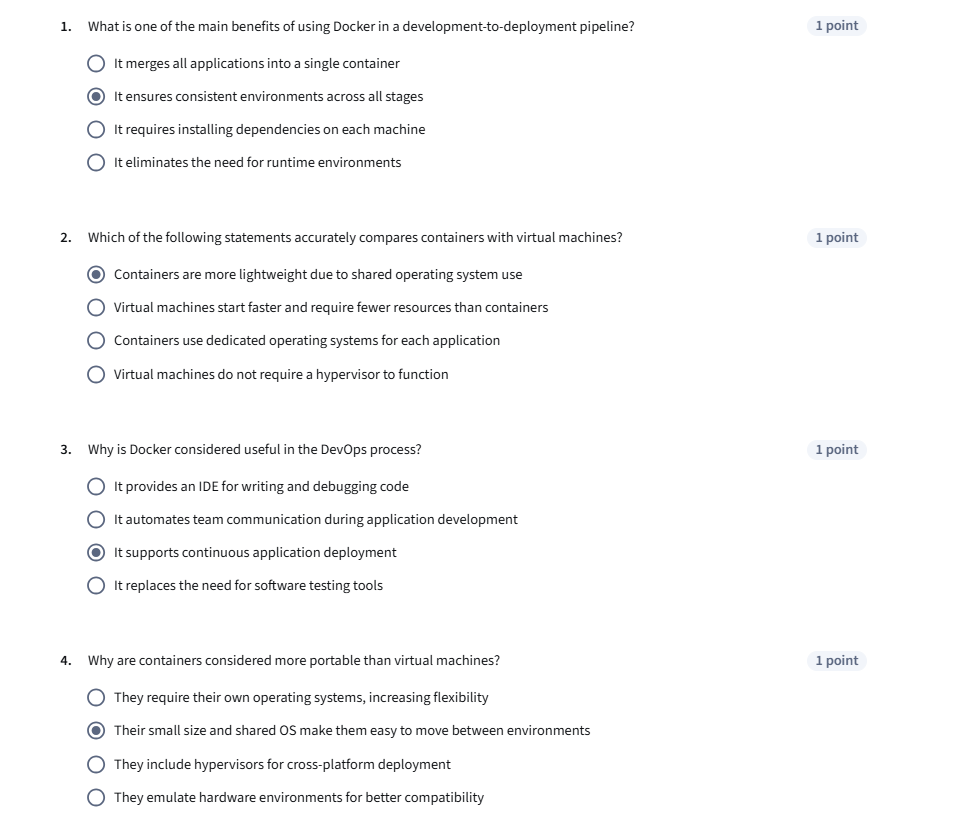